<a href="https://colab.research.google.com/github/GolfSuradej/IrisPAD/blob/main/Iris_PAD_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
## Author: Suradej
Date: Jan 4, 2023

In [ ]:
import cv2
import os
import numpy as np
from google.colab import drive
import h5py
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load Dataset


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Iris_PAD_Project/iris image/

/content/drive/MyDrive/Iris_PAD_Project/iris image


In [ ]:
ls

10.bmp  13.bmp  16.bmp  19.bmp  21.bmp  24.bmp  4.bmp  7.bmp
11.bmp  14.bmp  17.bmp  1.bmp   22.bmp  2.bmp   5.bmp  8.bmp
12.bmp  15.bmp  18.jpg  20.bmp  23.bmp  3.bmp   6.bmp  9.bmp


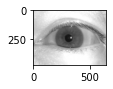

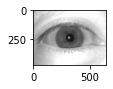

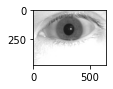

In [ ]:

path = "/content/drive/MyDrive/Iris_PAD_Project/iris image/"
i = 0
for file in os.listdir(path):
  plt.subplot(240 + 1 + i)
  imgFile = os.path.join(path,file)
  image = cv2.imread(imgFile,flags=1)
  plt.imshow(image)
  if i ==2:
    break
  else:
    i = i+1  
  plt.show()

# Feature Extraction: Binarized Statical Image (BSIF) 

Note extracted from a local machine

In [ ]:
cd /content/drive/MyDrive/Iris_PAD_Project/

/content/drive/MyDrive/Iris_PAD_Project


In [ ]:
ls

 0_iriscode_byMASEK/  'iris image'/   myBISF.npy   Refereces/


In [ ]:
myFeature = np.load("myBISF.npy")

In [ ]:
np.transpose(myFeature[0])

array([[76738.,  7136.,  7726.,  6933.,  6308.,  9740.,  6169.,  8660.,
         6713.,  9746.,  6838.,  8315.,  7759.,  8040.,  7197.,  6661.,
         5898.,  6860.,  6530.,  9224.,  6529.,  6922.,  8022.,  6300.,
         8160.,  7601., 10287.,  7183.,  5892.,  8706.,  5728.,  6679.]])

In [ ]:
print("No. of the Samples : " ,len(myFeature))
print("Feature length : ",len(myFeature[0]))

No. of the Samples :  30
Feature length :  32


#Label

In [ ]:
X_train = myFeature[0:20]

In [ ]:
Y_train = np.zeros([20,1])
print(np.transpose(Y_train))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


In [ ]:
clf = svm.SVC() # instantiate classifier with default hyperparameters

In [ ]:
x = X_train.reshape(20,32)
y = Y_train.reshape(20,1)
print(x.shape)
print(y.shape)

(20, 32)
(20, 1)


In [ ]:
y[0] = 1

In [ ]:
clf.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

# Test the model

In [ ]:
clf.predict(x[2].reshape(1,32))

array([0.])